# DS 3000 - Assignment 3

**Student Name**: [Yanzhen Chen]

**Date**: [9/19]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [2]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [5]:
import pandas as pd

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [7]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet',engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [9]:
# display the dimensions
print(f"data dimensions: {tripdata_df.shape}")

# show original data type
print("\noriginal data type:")
print(tripdata_df.dtypes)

# convert from object to boolean
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype(bool)

# Display the data type again to confirm the change
print("\nupdated data type:")
print(tripdata_df.dtypes)

data dimensions: (64809, 20)

original data type:
VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

updated data type:
VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

In [11]:
print("VendorID (Nominal):")
print(tripdata_df['VendorID'].head())

print("\npayment_type (Nominal):")
print(tripdata_df['payment_type'].head())

print("\nRateCodeID (Ordinal):")
print(tripdata_df['RatecodeID'].head())

print("\ntrip_type (Ordinal):")
print(tripdata_df['trip_type'].head())


VendorID (Nominal):
0    1.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: VendorID, dtype: float64

payment_type (Nominal):
0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: payment_type, dtype: float64

RateCodeID (Ordinal):
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: RatecodeID, dtype: float64

trip_type (Ordinal):
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: trip_type, dtype: float64


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

In [13]:
# Evaluate missing values
missing_values = tripdata_df.isnull().sum()
missing_percentage = (missing_values / len(tripdata_df)) * 100

print("Missing value statistics:")
print(missing_values[missing_values > 0])
print("\nPercentage of missing values (by column):")
print(missing_percentage[missing_percentage > 0])

# Determine if the missing value is a widespread problem
if missing_percentage[missing_percentage > 0].mean() < 5:
    print("\nmissing values are an isolated case.")
else:
    print("\nmissing values are a widespread issue.")

# Handle the missing values
for column in tripdata_df.columns:
    missing_pct = missing_percentage[column]
    if missing_pct > 30:
        print(f"delete {column} (Percentage of missing values: {round(missing_pct,2)}%)")
        tripdata_df = tripdata_df.drop(columns=[column])
    elif missing_pct > 0:
        if tripdata_df[column].dtype in ['int64', 'float64']:
            print(f"Fill the column with the median in column:{column} (Percentage of missing values: {round(missing_pct,2)}%)")
            tripdata_df[column] = tripdata_df[column].fillna(tripdata_df[column].median())
        else:
            print(f"Fill the column with the mode in column:{column} (Percentage of missing values: {round(missing_pct,2)}%)")
            tripdata_df[column] = tripdata_df[column].fillna(tripdata_df[column].mode()[0])

print("\nDimensions of the processed data:", tripdata_df.shape)


Missing value statistics:
RatecodeID               4821
passenger_count          4821
ehail_fee               64809
payment_type             4821
trip_type                4826
congestion_surcharge     4821
dtype: int64

Percentage of missing values (by column):
RatecodeID                7.438782
passenger_count           7.438782
ehail_fee               100.000000
payment_type              7.438782
trip_type                 7.446497
congestion_surcharge      7.438782
dtype: float64

missing values are a widespread issue.
Fill the column with the median in column:RatecodeID (Percentage of missing values: 7.44%)
Fill the column with the median in column:passenger_count (Percentage of missing values: 7.44%)
delete ehail_fee (Percentage of missing values: 100.0%)
Fill the column with the median in column:payment_type (Percentage of missing values: 7.44%)
Fill the column with the median in column:trip_type (Percentage of missing values: 7.45%)
Fill the column with the median in column:conge

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found. **`NOTE`: The issues that you found should not include any aspects from the previous questions.**
2. write suitable code to handle the invalid data that you found.

In [15]:
# 1. Check for negative trip distances
invalid_trip_distance = tripdata_df[tripdata_df['trip_distance'] < 0]
print(f"Number of negative trip distances: {len(invalid_trip_distance)}")

# 2. Check for negative total amounts
invalid_total_amount = tripdata_df[tripdata_df['total_amount'] < 0]
print(f"Number of negative total amounts: {len(invalid_total_amount)}")

# 3. Check for invalid passenger counts
invalid_passenger_count = tripdata_df[(tripdata_df['passenger_count'] <= 0) | (tripdata_df['passenger_count'].isnull())]
print(f"Number of invalid passenger counts: {len(invalid_passenger_count)}")

# Remove rows with negative trip distances
tripdata_df = tripdata_df[tripdata_df['trip_distance'] >= 0]

# Remove rows with negative total amounts
tripdata_df = tripdata_df[tripdata_df['total_amount'] >= 0]

# Remove rows with invalid passenger counts
tripdata_df = tripdata_df[(tripdata_df['passenger_count'] > 0) & (tripdata_df['passenger_count'].notnull())]

# The dimensions of the cleaned dataset
print("\nData dimensions after cleaning:", tripdata_df.shape)


Number of negative trip distances: 0
Number of negative total amounts: 188
Number of invalid passenger counts: 370

Data dimensions after cleaning: (64251, 19)


<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

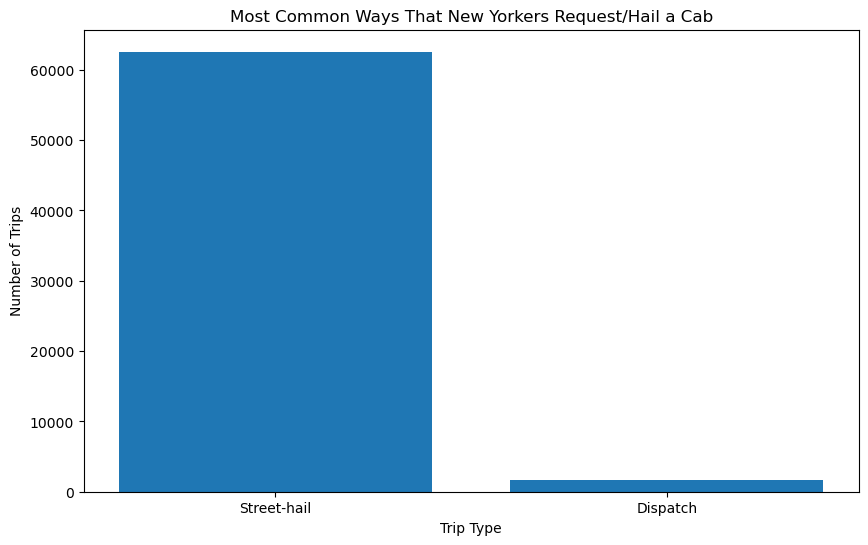

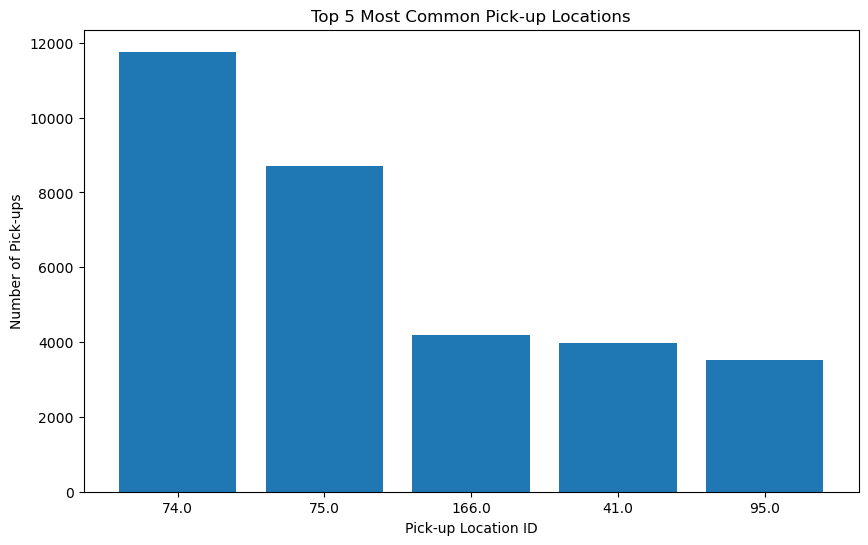

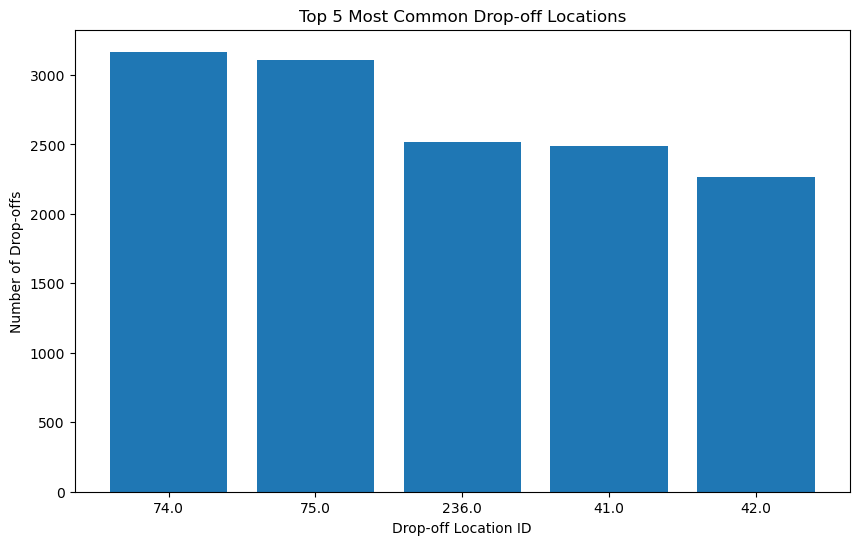

In [18]:
import matplotlib.pyplot as plt

# 1. Bar chart for the most common way New Yorkers request a cab
trip_type_counts = tripdata_df['trip_type'].value_counts()
trip_type_labels = ['Street-hail', 'Dispatch']

plt.figure(figsize=(10, 6))
plt.bar(trip_type_labels, trip_type_counts)
plt.title('Most Common Ways That New Yorkers Request/Hail a Cab')
plt.xlabel('Trip Type')
plt.ylabel('Number of Trips')
plt.show()

# 2. Bar chart for the most common pick-up locations 
top5_pickup_locations = tripdata_df['PULocationID'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top5_pickup_locations.index.astype(str), top5_pickup_locations.values)
plt.title('Top 5 Most Common Pick-up Locations')
plt.xlabel('Pick-up Location ID')
plt.ylabel('Number of Pick-ups')
plt.show()

# 3. Bar chart for the most common drop-off locations (DOLocationID)
top5_dropoff_locations = tripdata_df['DOLocationID'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top5_dropoff_locations.index.astype(str), top5_dropoff_locations.values)
plt.title('Top 5 Most Common Drop-off Locations')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Number of Drop-offs')
plt.show()


## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

In [20]:
# 1. On average, how far do New Yorkers usually travel using these taxis?
average_trip_distance = round(tripdata_df['trip_distance'].mean(), 2)
print(f"On average, New Yorkers travel {average_trip_distance} miles using taxis.")

# 2. What is the most expensive and least expensive trip?
most_expensive_trip = round(tripdata_df['total_amount'].max(), 2)
least_expensive_trip = round(tripdata_df['total_amount'].min(), 2)

print(f"The most expensive trip costs: ${most_expensive_trip}")
print(f"The least expensive trip costs: ${least_expensive_trip}")

# 3. What is the minimum, average and maximum tip amount for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)?

# Trips under 2 miles
under_2_miles = tripdata_df[tripdata_df['trip_distance'] < 2]
min_tip_under_2 = round(under_2_miles['tip_amount'].min(), 2)
avg_tip_under_2 = round(under_2_miles['tip_amount'].mean(), 2)
max_tip_under_2 = round(under_2_miles['tip_amount'].max(), 2)

print("\nTip statistics for trips under 2 miles:")
print(f"Minimum tip: ${min_tip_under_2}")
print(f"Average tip: ${avg_tip_under_2}")
print(f"Maximum tip: ${max_tip_under_2}")

# Trips 2 miles or more
over_2_miles = tripdata_df[tripdata_df['trip_distance'] >= 2]
min_tip_over_2 = round(over_2_miles['tip_amount'].min(), 2)
avg_tip_over_2 = round(over_2_miles['tip_amount'].mean(), 2)
max_tip_over_2 = round(over_2_miles['tip_amount'].max(), 2)

print("\nTip statistics for trips 2 miles or more:")
print(f"Minimum tip: ${min_tip_over_2}")
print(f"Average tip: ${avg_tip_over_2}")
print(f"Maximum tip: ${max_tip_over_2}")


On average, New Yorkers travel 13.8 miles using taxis.
The most expensive trip costs: $441.0
The least expensive trip costs: $0.0

Tip statistics for trips under 2 miles:
Minimum tip: $0.0
Average tip: $1.35
Maximum tip: $80.0

Tip statistics for trips 2 miles or more:
Minimum tip: $0.0
Average tip: $3.06
Maximum tip: $75.82


## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

I think this dataset could be a valuable source for future understanding of how New Yorkers use cabs.
First of all the dataset contains a wealth of information on a number of dimensions including trip distance, total amount, number of passengers, hailing method, pick-up and drop-off locations, and so on. This data helps to understand the travel habits of New Yorkers, such as common boarding and alighting locations, average trip distance, etc.
And after cleaning the invalid data, the dataset provides enough valid information. The statistics of common hailing modes and boarding and alighting locations provide insights into the travel patterns of New Yorkers, which can provide a basis for further analysis.